# Plant Disease Classification using Deep Learning

This notebook performs image classification on plant disease dataset using CNN.

In [2]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import glob

## Set Constants and Configuration

In [3]:
# Define constants
IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 20
DATASET_PATH = 'D:/ML/Dataset'

## Data Loading and Preprocessing

In [4]:
# Get class names from directory structure
class_names = sorted([name for name in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, name))])
num_classes = len(class_names)
print(f'Number of classes: {num_classes}')
print('Classes:', class_names)

Number of classes: 14
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [5]:
# Create data generator with augmentation for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 15099 images belonging to 14 classes.
Found 3768 images belonging to 14 classes.


## Create and Compile Model

In [6]:
# Create CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),
    
    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),
    
    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

## Train Model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/20
472/472 [==============================] - 801s 2s/step - loss: 1.0678 - accuracy: 0.6633 - val_loss: 1.6951 - val_accuracy: 0.6237
Epoch 2/20
472/472 [==============================] - 816s 2s/step - loss: 0.9764 - accuracy: 0.6879 - val_loss: 1.0881 - val_accuracy: 0.6661
Epoch 3/20
472/472 [==============================] - 827s 2s/step - loss: 0.9193 - accuracy: 0.7099 - val_loss: 0.7993 - val_accuracy: 0.7694
Epoch 4/20
472/472 [==============================] - 807s 2s/step - loss: 0.8094 - accuracy: 0.7457 - val_loss: 1.1714 - val_accuracy: 0.7553
Epoch 5/20
472/472 [==============================] - 793s 2s/step - loss: 0.7657 - accuracy: 0.7569 - val_loss: 0.5252 - val_accuracy: 0.8609
Epoch 6/20
472/472 [==============================] - 817s 2s/step - loss: 0.6947 - accuracy: 0.7806 - val_loss: 0.5180 - val_accuracy: 0.8572
Epoch 7/20
472/472 [==============================] - 828s 2s/step - loss: 0.6559 - accuracy: 0.7922 - val_loss: 2.9594 - val_accuracy: 0.4756

## Visualize Training Results

NameError: name 'history' is not defined

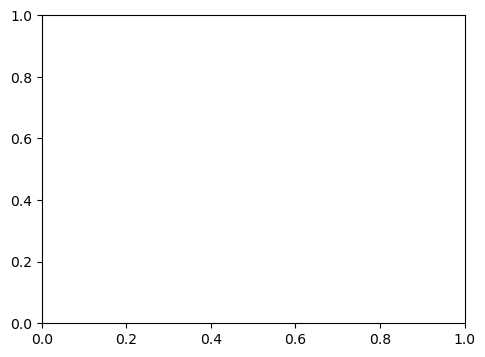

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save Model

In [ ]:
# Save the trained model
model.save('plant_disease_model.h5')
print('Model saved successfully!')

## Make Predictions

In [ ]:
def predict_image(image_path):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])
    
    # Display results
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2%}')
    plt.axis('off')
    plt.show()